### looking at 600 epochs of data augmented cnn run


In [89]:
import numpy as np
import glob



### read saved history data

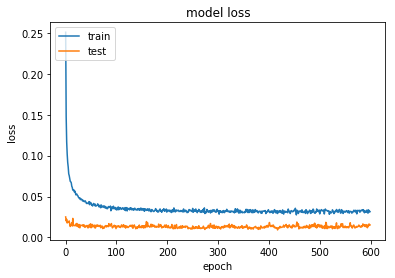

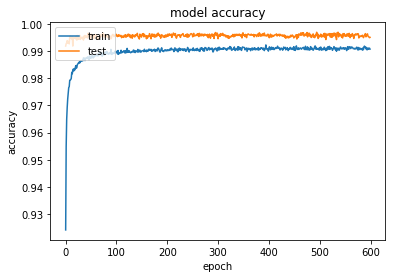

In [90]:
loss = np.load('loss.npy')
val_loss = np.load('val_loss.npy')
acc = np.load('acc.npy')
val_acc=np.load('val_acc.npy')

from matplotlib import pyplot as plt
%matplotlib inline

# show procession of training...
plt.plot(loss)
plt.plot(val_loss)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

plt.plot(acc)
plt.plot(val_acc)

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.close()

### histogram of the val_acc

median: 0.9958


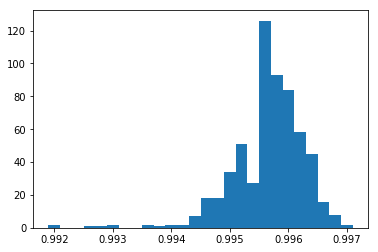

In [91]:
print('median:',  np.median(val_acc))
binwidth=0.0002
plt.hist(val_acc, bins=np.arange(min(val_acc), max(val_acc) + binwidth, binwidth))
plt.show()
plt.close()

In [92]:
saved_dir='saved_models'

model_names = glob.glob(saved_dir + "/*.hdf5")
sorted_names = sorted(model_names , reverse=True)
print(sorted_names)



['saved_models\\va0.9970-e0537-a0.99117-l0.03059-vl0.01109.hdf5', 'saved_models\\va0.9970-e0495-a0.99070-l0.03479-vl0.01153.hdf5', 'saved_models\\va0.9969-e0296-a0.99118-l0.03117-vl0.01124.hdf5']


In [93]:
# get mnist data
mnist = keras.datasets.mnist

print('loading MNIST data...')
# using path saves to the ~/.keras/data/path location so it's not downloaded next time
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# shape data for CNN

# convert the shape of data depending on the image data format
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

if is_channels_first :
    x_train2 = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test2 = x_test.reshape(x_test.shape[0], 1, 28, 28)
else:
    x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# get hot label output

y_train2 = keras.utils.to_categorical(y_train, num_classes=10)
y_test2 = keras.utils.to_categorical(y_test, num_classes=10)

# normalize the data
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

# convert the data from 0 to 1.0
x_train2, x_test2 = x_train2 / 255, x_test2 / 255

print('x train shape:',x_train2.shape)
print('y train shape:',y_train2.shape)
print('x test shape:',x_test2.shape)
print('y test shape:',y_test2.shape)

from tensorflow import keras

loading MNIST data...
x train shape: (60000, 28, 28, 1)
y train shape: (60000, 10)
x test shape: (10000, 28, 28, 1)
y test shape: (10000, 10)


### read and show confusion matrix

In [94]:

model = keras.models.load_model(sorted_names[2])
slave1 = keras.models.load_model(sorted_names[0])
slave2 = keras.models.load_model(sorted_names[1])

In [95]:
predictions = model.predict(x_test2)
slave1_pred = slave1.predict(x_test2)
slave2_pred = slave2.predict(x_test2)

my_matrix = np.zeros( (10,10), dtype='int')

# count of good guesses
count_matrix = np.zeros( (10,), dtype='int')
good_matrix = np.zeros( (10,), dtype='int')
miss_count = 0;

# iterate through 10,000 test data
for i in range(10000):
    count_matrix[y_test[i]] +=1
    guess = np.argmax(predictions[i])
    s1_guess = np.argmax(slave1_pred[i])
    s2_guess = np.argmax(slave2_pred[i])
    
    if s1_guess == s2_guess:
        guess = s1_guess
    
    if guess == y_test[i]:
        good_matrix[guess] +=1
    else:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1
        miss_count +=1

# show good matrix
print('missed count:', miss_count , 'ouf of 10,000')
print('Good guesses:')
for i in range(10):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent, 'missed:', count_matrix[i] - good_matrix[i])


missed count: 21 ouf of 10,000
Good guesses:
match count for: 0 = 980 / 980 ( 100.00 %) missed: 0
match count for: 1 = 1134 / 1135 ( 99.91 %) missed: 1
match count for: 2 = 1030 / 1032 ( 99.81 %) missed: 2
match count for: 3 = 1010 / 1010 ( 100.00 %) missed: 0
match count for: 4 = 980 / 982 ( 99.80 %) missed: 2
match count for: 5 = 889 / 892 ( 99.66 %) missed: 3
match count for: 6 = 956 / 958 ( 99.79 %) missed: 2
match count for: 7 = 1026 / 1028 ( 99.81 %) missed: 2
match count for: 8 = 970 / 974 ( 99.59 %) missed: 4
match count for: 9 = 1004 / 1009 ( 99.50 %) missed: 5



Confusion Matrix


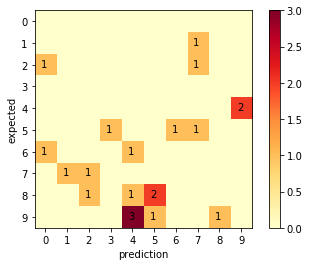

In [96]:
print('\nConfusion Matrix')

fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()

Expected: 9 , predicted: 4


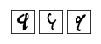

In [97]:
expected_number = 9
guessed_number = 4

print('Expected:', expected_number, ', predicted:', guessed_number)
non_match_list = []
for i in range(10000):
    if y_test[i] == expected_number:
        guess = np.argmax(predictions[i])
            
        s1_guess = np.argmax(slave1_pred[i])
        s2_guess = np.argmax(slave2_pred[i])

        if s1_guess == s2_guess:
            guess = s1_guess
            
        if guess == guessed_number:
            non_match_list.append(i)

fig = plt.figure( figsize = (10,2))

for i in range(len(non_match_list)):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = non_match_list[i]
    plt.imshow(x_test[index], cmap='gray_r')
plt.show()
plt.close()